## Evolution of Forest Area

In this notebook, forest evolution in Germany from 1992-2022 is assessed. Data stems from ESA Landcover data that has been processed in the previous notebook. The following steps are included:
- Count pixels of each forest type per year
- Calculate forest area per forest type and year
- Plot evolution of forest types across years

In [1]:
# import libraries
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# create empty list to collect pixel counts
counts_list = []

In [4]:
# loop over forest datasets to count pixels for each forest class
for year in range(1992, 2023):

    # open netCDF dataset of corresponding year
    directory = "./Forest_GER/"
    for file in os.listdir(directory):
        if str(year) in file and file.endswith(".nc"):
            forest = xr.open_dataarray(os.path.join(directory, file), decode_coords = "all", decode_times = True)

    # flatten data into NumPy array
    pixel_values = forest.values.flatten()

    # get unique values and counts
    unique_values, counts = np.unique(pixel_values, return_counts=True)

    # create dataframe with classes and counts
    counts_df = pd.DataFrame([counts], columns = unique_values)

    # write corresponding year into new column
    counts_df["Year"] = year

    # append results to list of pixel counts
    counts_list.append(counts_df)        


c:\Users\irish\miniconda3\envs\KFF_SoSe23\Lib\site-packages\xarray\backends\api.py:740: UserWarning: Variable(s) referenced in bounds not in variables: ['lat_bounds']
  dataset = open_dataset(
c:\Users\irish\miniconda3\envs\KFF_SoSe23\Lib\site-packages\xarray\backends\api.py:740: UserWarning: Variable(s) referenced in bounds not in variables: ['lon_bounds']
  dataset = open_dataset(
c:\Users\irish\miniconda3\envs\KFF_SoSe23\Lib\site-packages\xarray\backends\api.py:740: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bounds']
  dataset = open_dataset(
c:\Users\irish\miniconda3\envs\KFF_SoSe23\Lib\site-packages\xarray\backends\api.py:740: UserWarning: Variable(s) referenced in bounds not in variables: ['lat_bounds']
  dataset = open_dataset(
c:\Users\irish\miniconda3\envs\KFF_SoSe23\Lib\site-packages\xarray\backends\api.py:740: UserWarning: Variable(s) referenced in bounds not in variables: ['lon_bounds']
  dataset = open_dataset(
c:\Users\irish\miniconda3\envs\KFF

In [5]:
# convert list with all counts into dataframe
final_counts_df = pd.concat(counts_list, ignore_index = True)

In [6]:
# convert all column names to strings
final_counts_df.columns = final_counts_df.columns.astype(str)

In [7]:
# combine classes 70 and 80 to class "needleleaved"
final_counts_df["NL"] = final_counts_df["70.0"] + final_counts_df["80.0"]

# rename class 60 to "broadleaved" and 90 to "mixed leaf"
final_counts_df = final_counts_df.rename(columns = {"60.0": "BL", "90.0": "ML"})

# deleted columns not needed
final_counts_df = final_counts_df.drop(columns = ["70.0", "80.0", "nan"])

# reorder forest classes
final_counts_df = final_counts_df.loc[:, ["Year", "BL", "NL", "ML"]]

In [8]:
final_counts_df

,Year,BL,NL,ML
0,1992,409444,919942,282816
1,1993,409274,919511,282755
2,1994,409106,919084,282679
3,1995,408560,916045,288676
4,1996,410465,924167,292009
5,1997,411964,924854,294543
6,1998,411514,921598,295160
7,1999,417491,917602,300649
8,2000,418189,913713,301207
9,2001,415962,909167,301109


In [ ]:
# save final counts as csv file
final_counts_df.to_csv("./Tables/Forest_GER_Pixel_Counts.csv")

In [10]:
# calculate forest area in km²
# resolution of original landcover data: 300 m
# -> one pixel has area of 90 000 m² or 0.09 km²
forest_area_df = final_counts_df.copy()
forest_area_df.iloc[:, 1:] *= 0.09

In [11]:
# create a new column with the total forest area
forest_area_df["all"] = forest_area_df["BL"] + forest_area_df["NL"] + forest_area_df["ML"]

In [12]:
forest_area_df

,Year,BL,NL,ML,all
0,1992,36849.96,82794.78,25453.44,145098.18
1,1993,36834.66,82755.99,25447.95,145038.60
2,1994,36819.54,82717.56,25441.11,144978.21
3,1995,36770.40,82444.05,25980.84,145195.29
4,1996,36941.85,83175.03,26280.81,146397.69
5,1997,37076.76,83236.86,26508.87,146822.49
6,1998,37036.26,82943.82,26564.40,146544.48
7,1999,37574.19,82584.18,27058.41,147216.78
8,2000,37637.01,82234.17,27108.63,146979.81
9,2001,37436.58,81825.03,27099.81,146361.42


In [ ]:
# save forest areas as csv file
forest_area_df.to_csv("./Tables/Forest_GER_Area.csv")

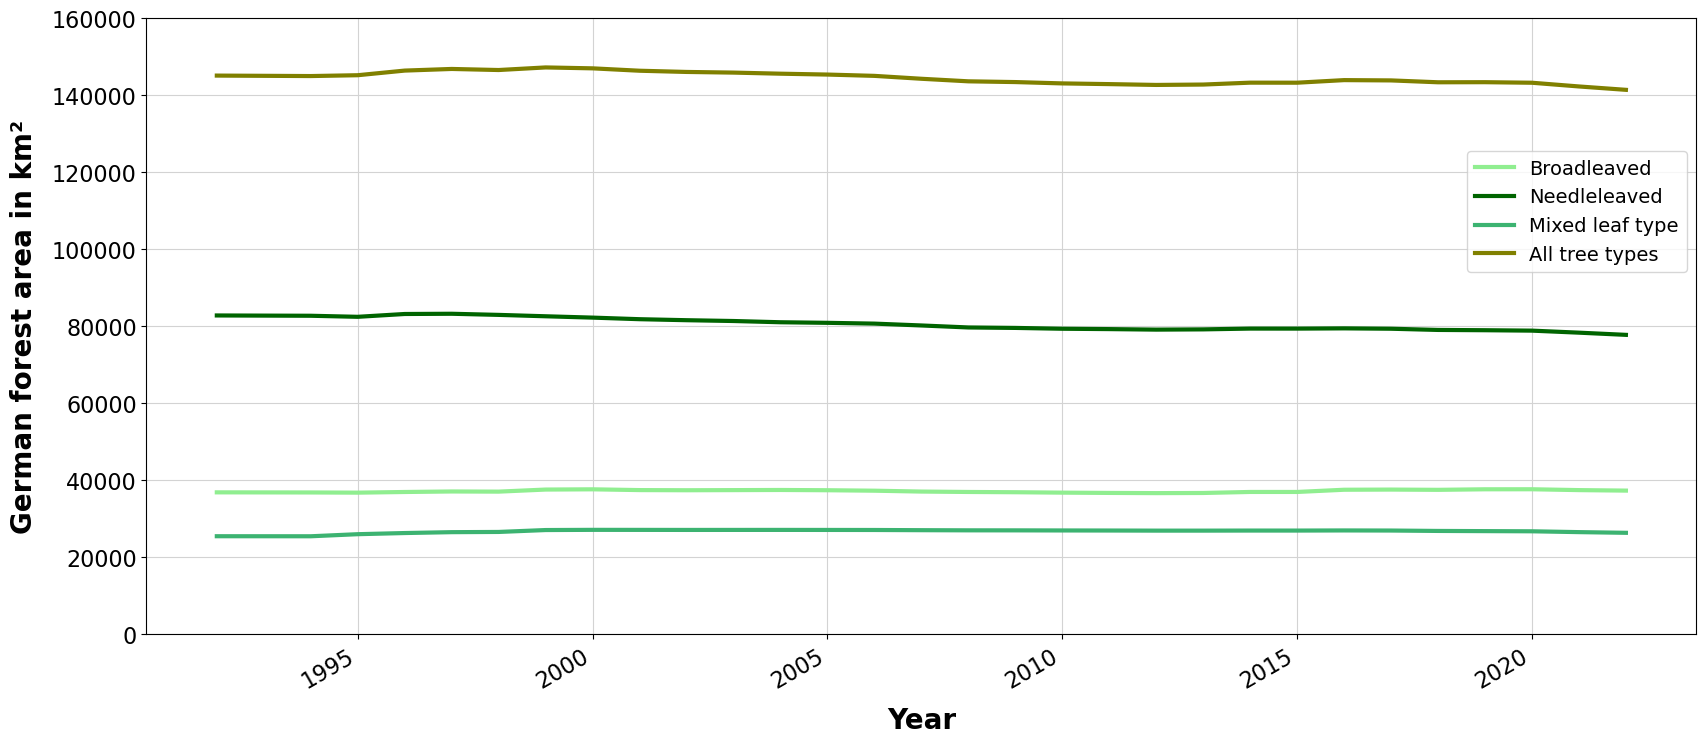

In [14]:
# plot evolution of german forest area across time
data = forest_area_df
fig, ax = plt.subplots(figsize=(20,8))
ax.plot('Year', 'BL', data=data, color='lightgreen', linewidth=3, linestyle='-', label="Broadleaved")
ax.plot('Year', 'NL', data=data, color='darkgreen', linewidth=3, linestyle='-', label="Needleleaved")
ax.plot('Year', 'ML', data=data, color='mediumseagreen', linewidth=3, linestyle='-', label="Mixed leaf type")
ax.plot('Year', 'all', data=data, color='olive', linewidth=3, linestyle='-', label="All tree types")
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right', fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,160000)
ax.set_ylabel('German forest area in km²', fontsize=20, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=20, weight='bold', labelpad=10)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=14,  bbox_to_anchor=(1, 0.8))
plt.savefig("./Figures/Forest_Area_GER.png", bbox_inches="tight")